# Task 4 - To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # for data visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # for data visualization

# Loading Datasets

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

# Exploratory Data Analysis

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


C:\Users\Tushar Khatri .LAPTOP-SLBNP4RE\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


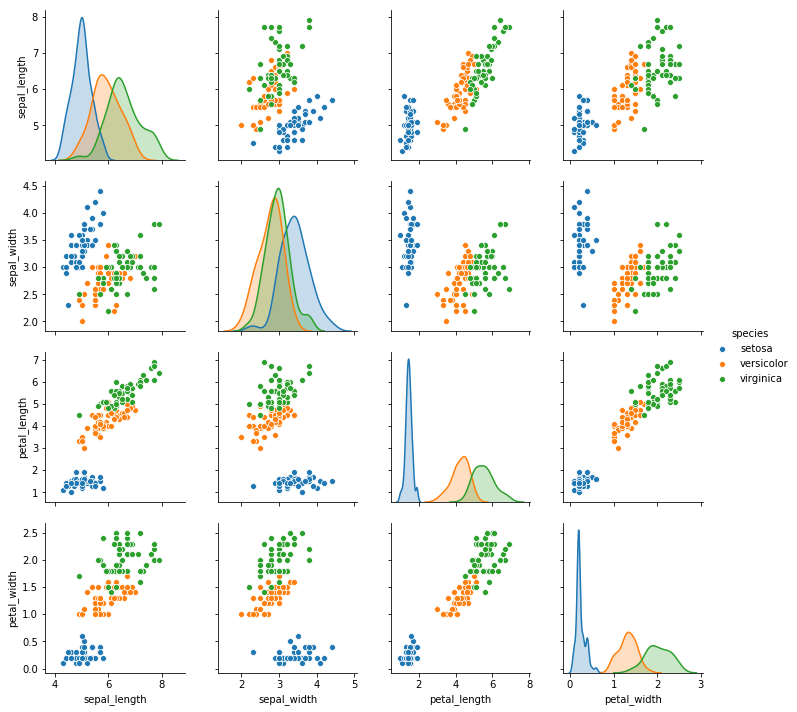

In [7]:
sns.pairplot(data=data,hue='species')

In [8]:
x = data.iloc[:,0:4]
y = data.values[:,-1]

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = data.values[:,-1]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from sklearn.model_selection import train_test_split
#splitting data into testing data and training data
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Training Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
y_prediction = model.predict(x_test)
d = pd.DataFrame({'Predicted' : y_prediction,'y_test' : y_test})
d

,Predicted,y_test
0,1,1
1,0,0
2,0,0
3,0,0
4,2,2
5,0,0
6,1,1
7,2,2
8,2,2
9,2,2


# Accuracy Check

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_prediction)
print("Accuracy = "+str(acc))

Accuracy = 0.9210526315789473


In [15]:
from sklearn.tree import plot_tree

# Plotting Tree

[Text(281.333,1252.17,'petal_width <= 0.8\ngini = 0.664\nsamples = 112\nvalue = [33, 39, 40]\nclass = virginica'),
 Text(140.667,1024.5,'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = setosa'),
 Text(422,1024.5,'petal_length <= 4.75\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]\nclass = virginica'),
 Text(281.333,796.833,'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(562.667,796.833,'petal_length <= 4.95\ngini = 0.13\nsamples = 43\nvalue = [0, 3, 40]\nclass = virginica'),
 Text(422,569.167,'petal_width <= 1.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = virginica'),
 Text(281.333,341.5,'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'),
 Text(562.667,341.5,'sepal_width <= 3.1\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(422,113.833,'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = virginica'),
 Text(703.333,113.833,'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(703.333,

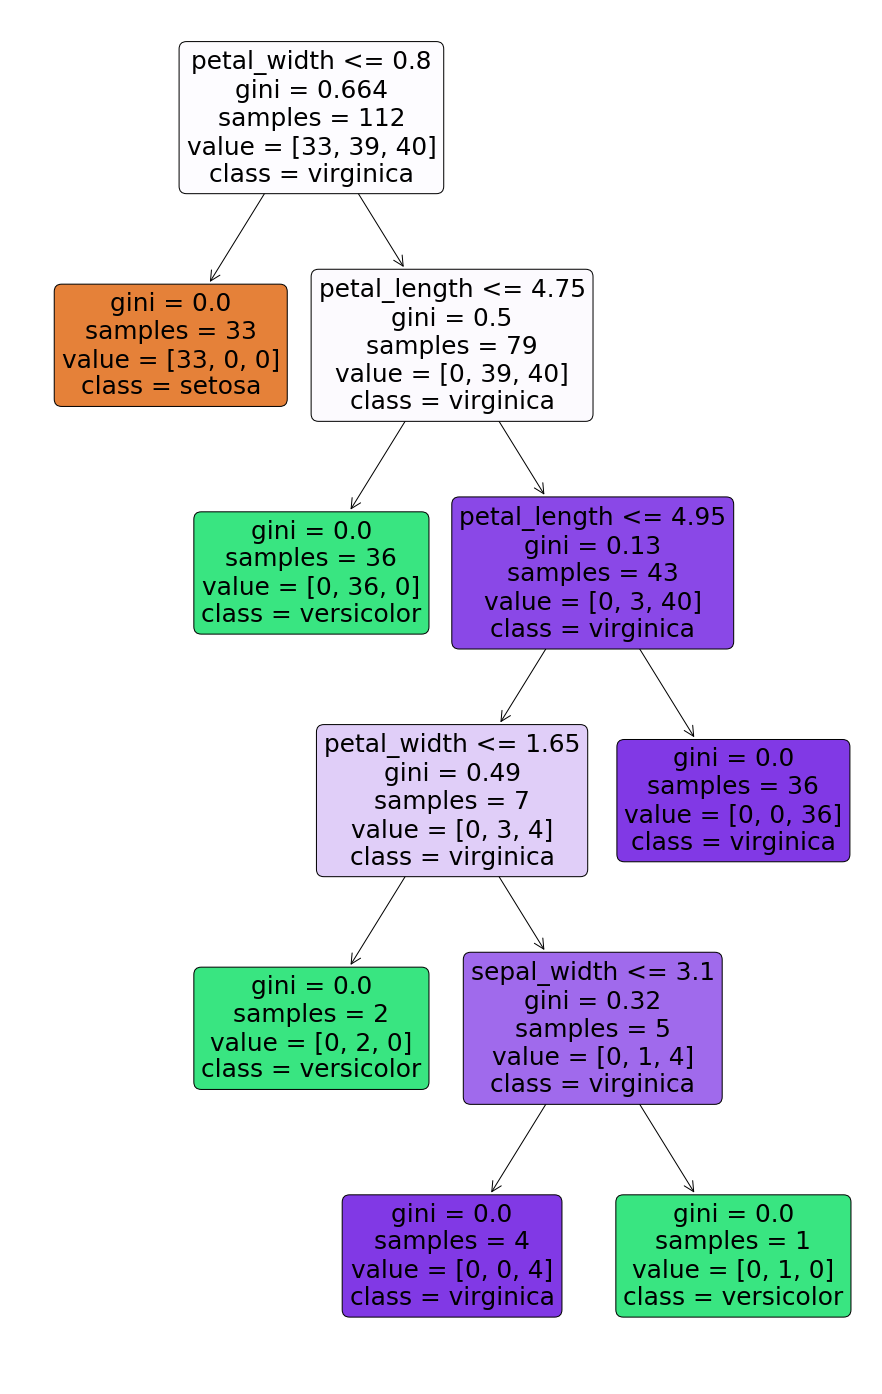

In [25]:
plt.figure(figsize=(15,25))
plot_tree(model, feature_names=x_train.columns,class_names=['setosa', 'versicolor', 'virginica'], filled=True, rounded=True )